### Example 1 - PandasAI & Feature Services

In this example you will explore the following concepts:

1. Connect to an Azure OpenAI Model (LLM), GPT-4o and run a simple test to make sure it's working correctly.
2. Use PandasAI Agent to create a sample dataframe powered by your LLM to ask it a few questions about the dataset, and validate the responses.
3. Taking the same approach from the previous step, connect a PandasAI Agent to an ArcGIS Online Feature Service, testing the questions and responses.

Let's begin!


Import the necessary python libraries


In [1]:
import toml
import pandas as pd
from langchain_openai import AzureChatOpenAI
from pandasai import Agent
from data.sample_dataframe import dataframe

from arcgis import GIS

/Users/adam6475/dev/genai-training/.venv/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Import the Azure OpenAI LLM connection information from a configuration file.


In [9]:
azure_config = toml.load("config.toml")["configs"][0]
azure_config

{'type': 'azure_llm',
 'model_name': 'gpt-4o',
 'deployment_name': 'gpt-4o',
 'api_endpoint': 'https://ist-apim-aoai.azure-api.net/load-balancing/gpt-4o',
 'api_key': '2ace346327e444fca00da0b2945e3b3f',
 'api_version': '2024-06-01'}

Make the connection using the configuration options and test a simple chat message.


In [10]:
llm = AzureChatOpenAI(
    openai_api_version=azure_config["api_version"],
    azure_deployment=azure_config["deployment_name"],
    api_key=azure_config["api_key"],
    azure_endpoint=azure_config["api_endpoint"],
    model=azure_config["model_name"],
    model_name=azure_config["model_name"],
    temperature=0,
)
response = llm.invoke("hi")
response.content

'Hello! How can I assist you today?'

Create a simple Pandas dataframe using sample GDP and Happiness index data by country


In [4]:
df = pd.DataFrame(dataframe)
df.head()

,country,gdp,happiness_index
0,United States,19294482071552,6.94
1,United Kingdom,2891615567872,7.16
2,France,2411255037952,6.66
3,Germany,3435817336832,7.07
4,Italy,1745433788416,6.38


Create a PandasAI Agent using your LLM connection and your sample dataframe and begin asking questions.


{'dataframe': {'type': 'dataframe', 'value':           country             gdp  happiness_index
6          Canada   1607402389504             7.23
7       Australia   1490967855104             7.22
1  United Kingdom   2891615567872             7.16
3         Germany   3435817336832             7.07
0   United States  19294482071552             6.94}, 'plot': {'type': 'plot', 'value': '/Users/adam6475/dev/genai-training/exports/charts/temp_chart.png'}}


,country,gdp,happiness_index
6,Canada,1607402389504,7.23
7,Australia,1490967855104,7.22
1,United Kingdom,2891615567872,7.16
3,Germany,3435817336832,7.07
0,United States,19294482071552,6.94


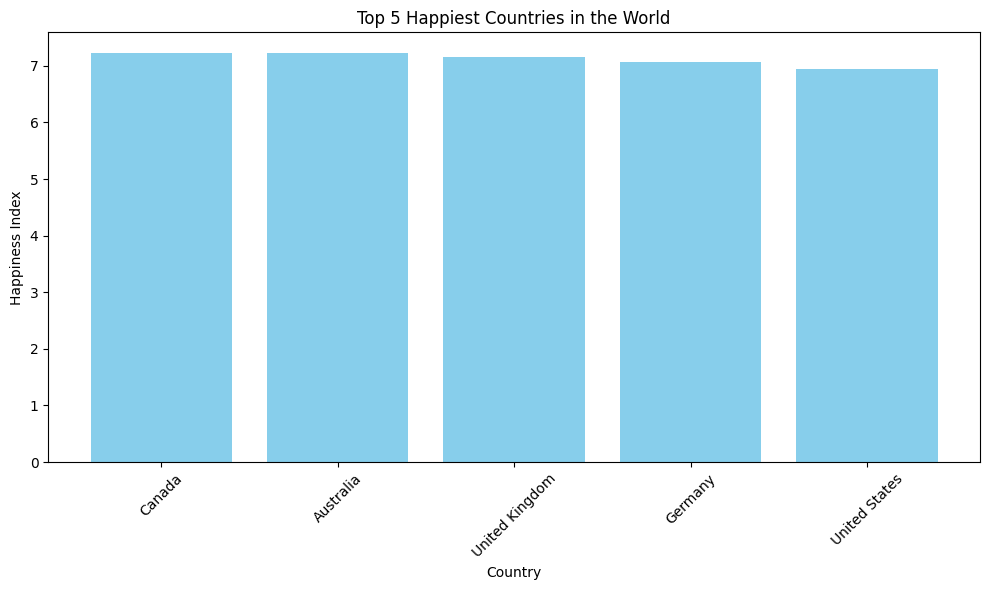

In [5]:
question1 = "Calculate the sum of the gdp of north american countries"
question2 = "What are the top five happiest countries in the world?"
question3 = "...?"

agent = Agent(df, config={"llm": llm, "enable_cache": False})

response = agent.chat(question2)

response

Connect to ArcGIS Online and load the wildfires feature layer


In [6]:
gis = GIS()
wildfires_item_id = "d957997ccee7408287a963600a77f61f"
layer_id = 0
wildfires_item = gis.content.get(wildfires_item_id)
wildfires_feature_layer = wildfires_item.layers[layer_id]
wildfires_feature_layer

<FeatureLayer url:"https://services9.arcgis.com/RHVPKKiFTONKtxq3/arcgis/rest/services/USA_Wildfires_v1/FeatureServer/0">

Query the wildfires layer for all the features and return the result as a Pandas dataframe


In [7]:
wildfires_query_df = wildfires_feature_layer.query(
    where="1=1", out_fields="*", return_geometry=False, as_df=True
)
wildfires_query_df.head()

,OBJECTID,IncidentName,IncidentTypeCategory,UniqueFireIdentifier,DailyAcres,CalculatedAcres,PercentContained,ICS209ReportDateTime,FireDiscoveryDateTime,DiscoveryAcres,...,ControlDateTime,FinalAcres,IsValid,FireOutDateTime,ModifiedOnDateTime,IncidentTypeKind,IrwinID,GlobalID,ModifiedOnAge,FireDiscoveryAge
0,1,Heron WPA RX,RX,2024-NERBR-240126,320.0,<NA>,<NA>,NaT,2024-02-23 15:18:16,<NA>,...,NaT,<NA>,1,NaT,2024-08-13 18:48:38,FI,c3fc17f4-7a72-4442-bf9b-45a68d0fcb96,c3fc17f4-7a72-4442-bf9b-45a68d0fcb96,0,172
1,2,Wikle Store,WF,2024-GAGAS-240090,40.0,<NA>,<NA>,NaT,2024-04-04 14:04:00,40.0,...,NaT,<NA>,1,NaT,2024-08-07 17:46:39,FI,5cccc51d-b003-43c7-ae2d-17eab0c19ec4,dee64b25-ed8a-4140-978a-e73180ded3f4,6,131
2,3,Lombard Bridge,WF,2024-MTLG43-000156,0.1,<NA>,<NA>,NaT,2024-04-09 17:30:33,0.1,...,NaT,<NA>,1,NaT,2024-08-11 21:35:31,FI,2039e002-6ed8-451f-a41a-0c873342bd00,1a721f1e-8ed9-4a13-b1b7-8f0a3524c7d1,2,126
3,4,RX Rocky Flats,RX,2024-GACHF-240026,1172.0,<NA>,<NA>,NaT,2024-04-15 12:00:00,<NA>,...,NaT,<NA>,1,NaT,2024-08-12 20:09:43,FI,6670003c-a9c6-4413-84eb-1cce430d4cd4,42f6a96f-4cb7-4505-a645-23193adce170,1,120
4,5,Middleman Unit 76 RX,RX,2024-MTHLF-000184,<NA>,<NA>,<NA>,NaT,2024-04-23 15:29:57,<NA>,...,NaT,<NA>,1,NaT,2024-08-13 17:00:23,FI,aa590f8e-5ecd-487f-8b11-d88294790379,9e2f2f30-2c36-449e-89b1-d00c5f207db5,0,112


Create a PandasAI Agent using this dataframe and our LLM connection.

**Create your own question to ask and assign it to the final `question` variable that is commented out. Un-comment it, and run to see your results**


In [17]:
wildfires_agent = Agent(wildfires_query_df, config={"llm": llm, "enable_cache": False})

question = "How many wildfires are there right now?"
# question = "List the fires that are 0 percent contained"
# question = "<insert question here>"

response = wildfires_agent.chat(question2)
response

,OBJECTID,IncidentName,IncidentTypeCategory,UniqueFireIdentifier,DailyAcres,CalculatedAcres,PercentContained,ICS209ReportDateTime,FireDiscoveryDateTime,DiscoveryAcres,...,ControlDateTime,FinalAcres,IsValid,FireOutDateTime,ModifiedOnDateTime,IncidentTypeKind,IrwinID,GlobalID,ModifiedOnAge,FireDiscoveryAge
16,17,Midnight,WF,2024-AKUYD-000187,50542.79,40285.1163,0.0,2024-07-14 02:57:46,2024-06-19 16:07:44,0.1,...,NaT,<NA>,1,NaT,2024-08-07 00:57:07,FI,61097d53-a45f-438e-8137-32afe131704c,83551e1f-286a-4085-aa60-e13f870a6d5a,6,55
17,18,Van Hatten,WF,2024-AKUYD-000191,22915.94,13348.156,0.0,2024-07-14 02:58:55,2024-06-20 02:02:31,40.0,...,NaT,<NA>,1,NaT,2024-08-07 00:57:47,FI,84ccf01e-1dba-48d2-a1a0-d4b6c45f6025,36920426-f3f5-405c-b4cf-194b958760cb,6,54
18,19,Noodor,WF,2024-AKUYD-000192,13793.34,13878.4141,0.0,2024-07-15 02:56:51,2024-06-20 16:19:27,0.1,...,NaT,<NA>,1,NaT,2024-08-06 16:39:48,FI,85f9c95d-a679-404a-81cb-87b1ed446b4c,3592e6e8-ccd6-4717-b1a8-18d95291fead,7,54
19,20,Eroded,WF,2024-AKTAD-000194,369.08,359.4475,0.0,2024-07-14 23:04:03,2024-06-20 20:37:08,0.1,...,NaT,<NA>,1,NaT,2024-08-06 19:02:58,FI,ad29c230-68e0-4e03-8307-76c4ee40ad0d,07a80225-6ecf-4954-968c-10a0ab706633,7,54
21,22,Deep,WF,2024-AKTAD-000213,24876.23,16743.7742,0.0,2024-07-15 03:55:28,2024-06-22 21:56:00,0.1,...,NaT,<NA>,1,NaT,2024-08-06 19:03:54,FI,1b945ace-4700-4723-bcdc-d277e69dd91b,c1ab3158-9dea-4602-b5cf-494201334548,7,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,RX Nueces 2087,RX,2024-TXTXS-242087,45.0,<NA>,0.0,NaT,2024-08-05 16:27:22,45.0,...,NaT,<NA>,1,NaT,2024-08-09 22:01:58,FI,3e6ba539-19e2-4e45-89f4-1d49af271f3b,1ed37e16-4ce7-4007-9ea4-65c6afcf5e92,3,8
328,329,Dixon,WF,2024-ORUPF-240361,1833.0,1985.5656,0.0,2024-08-13 03:54:13,2024-08-10 21:43:02,1000.0,...,NaT,<NA>,1,NaT,2024-08-13 20:35:20,FI,3f496bbe-5704-44ee-af9e-b4b6111581c3,b63bc3ba-a5db-4a40-98f3-9539ad780937,0,3
404,405,Rx Gregg 2133,RX,2024-TXTXS-242133,55.0,<NA>,0.0,NaT,2024-08-08 12:50:00,55.0,...,NaT,<NA>,1,NaT,2024-08-12 13:27:30,FI,2270e849-2d0e-43b9-93cf-1bf252a185db,1970aa39-7576-4592-ac8a-50e0eaa71ae7,1,5
405,406,Rx Gregg 2111,RX,2024-TXTXS-242111,21.0,<NA>,0.0,NaT,2024-08-07 12:50:00,21.0,...,NaT,<NA>,1,NaT,2024-08-12 13:27:30,FI,bb6e00e4-9afc-4cb6-87e6-9ab11d6bdf39,e1e93f58-e22c-4bdb-97de-4b9d7b762d38,1,6
